In [1]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

In [2]:
# Load the dataset 
df = pd.read_csv("bank-additional-full.csv", sep=";")

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# 1. Define Problem and Data Understanding

- **Stakeholder Identification**

Who is the stakeholder?

The stakeholder is likely a bank or financial institution that is running marketing campaigns to promote a specific product (e.g., term deposits).

They are interested in improving the success rate of their campaigns by identifying which customers are more likely to subscribe to the product.

- **Problem Statement**

What is the problem?

The bank is facing challenges in converting leads into customers during their marketing campaigns. Specifically, they have a low success rate in getting customers to subscribe to term deposits.

This inefficiency leads to wasted resources (time, money, and effort) on customers who are unlikely to convert.

Why is this problem important?

A low conversion rate directly impacts the bank’s revenue and profitability.

It also affects customer satisfaction if irrelevant offers are repeatedly made to uninterested customers.

Improving the campaign’s effectiveness can lead to better resource allocation and higher ROI.

- **Specific and Measurable Goals**

Goal: Increase the success rate of the marketing campaign by identifying high-potential customers using data-driven insights.

Target: Achieve at least a 20% increase in the conversion rate (from "no" to "yes" in the y column) by leveraging predictive modeling.

**The bank wants to improve the success rate of its marketing campaigns by predicting which customers are more likely to subscribe to term deposits. This will help optimize resource allocation and increase ROI.**

# Data Understanding

Dataset Overview

- Source of the Dataset:

This dataset appears to be sourced from a public repository, possibly the UCI Machine Learning Repository , which provides datasets for research and educational purposes.

It is commonly used for binary classification tasks in banking marketing campaigns.

- Creator of the Dataset:

The dataset was likely created by researchers or professionals in the banking industry who collected data from real-world marketing campaigns.

- When Was the Data Created?

Based on the features and context, the dataset seems to represent data collected over a period of time, likely spanning multiple months or years (e.g., campaigns conducted between 2008–2013).


**Description of Columns**

Here’s a detailed breakdown of the columns:

- age: Usia pelanggan.
- job: Pekerjaan pelanggan.
- marital: Status pernikahan.
- education: Tingkat pendidikan.
- default, housing, loan: Informasi kredit pelanggan.
- contact, month, day_of_week: Detail kontak.
- duration: Durasi kontak terakhir.
- campaign: Jumlah kontak selama kampanye ini.
- pdays: Hari terakhir kontak dari kampanye sebelumnya.
- previous: Jumlah kontak sebelum kampanye ini.
- poutcome: Hasil kampanye sebelumnya.
- emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed: Indikator ekonomi.
- y: Target variabel (yes/no).

**The dataset provides comprehensive information about customer profiles, campaign interactions, and economic indicators. It is relevant to the problem but may require preprocessing to address challenges like class imbalance and feature engineering.**

 # 2. Data Cleaning & Preprocessing

 **Initial Data Inspection**

In [3]:
# Get summary statistics for numerical columns
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [4]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Our dataset has no missing value.

In [5]:
df = df.drop_duplicates()

Our dataset contains:

1. Numerical Features : age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed.

2. Categorical Features : job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome.

3. Target Variable : y (binary: "yes" or "no").

## Outliers

We will manually capping the extreme outliers from the data using 'waterfall' method. We will continue to monitoring the amount of data for each feature that has been capped. So there will be not much data is wasted.

In [6]:
num_features = list(df.describe().columns)
num_features

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

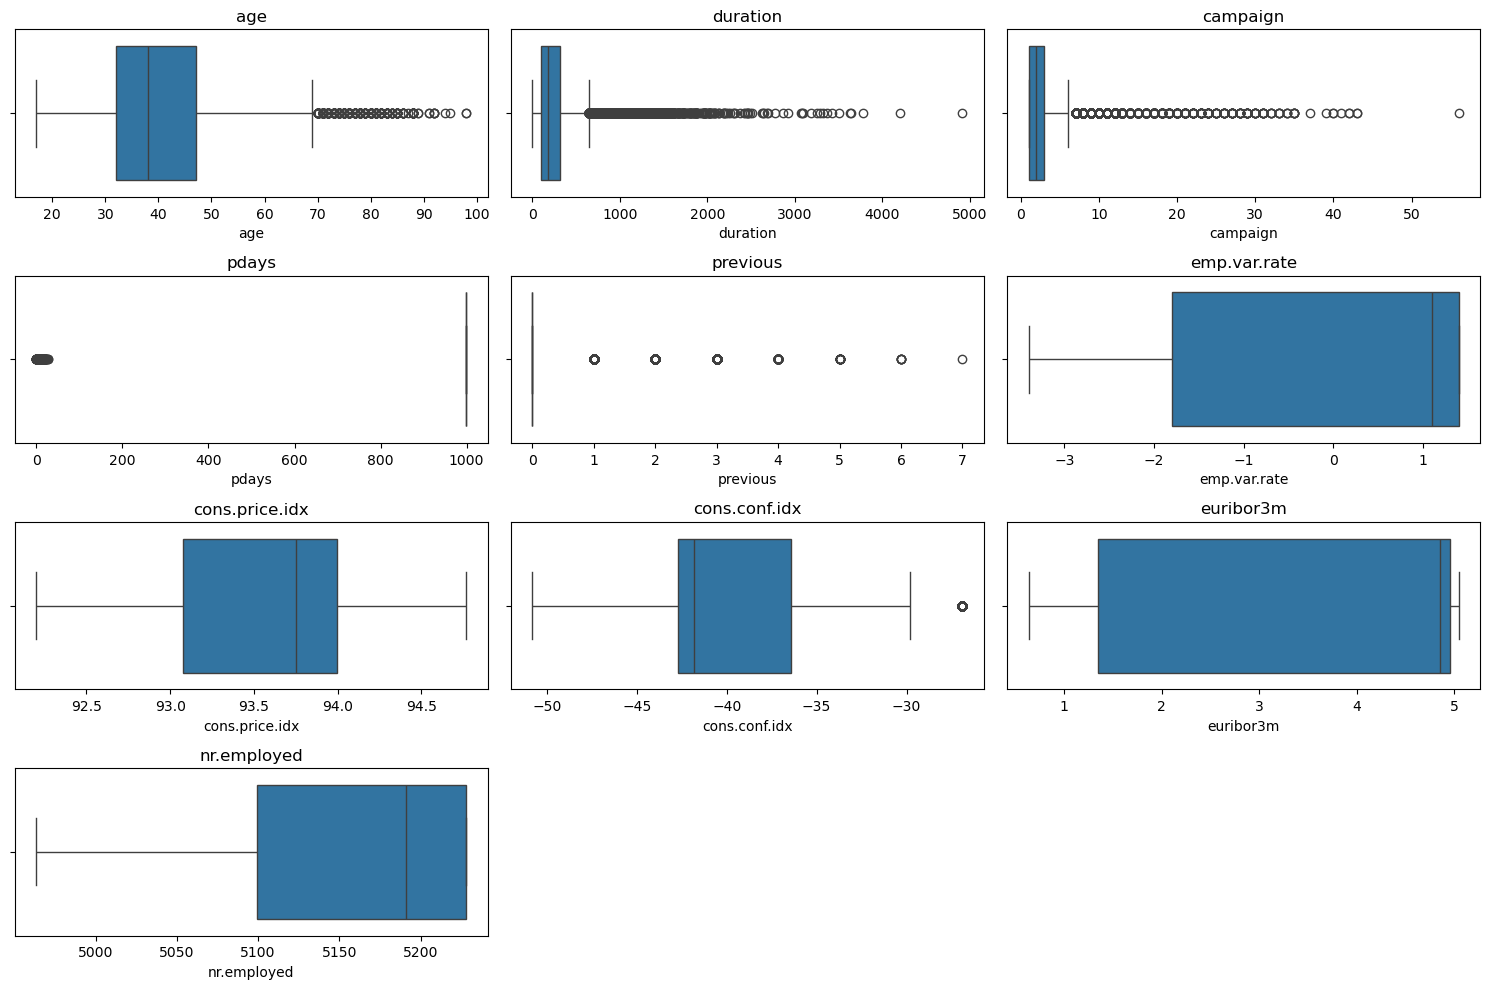

In [7]:
plt.figure(figsize=(15, 10))

plot_number = 1
for feat in num_features:
    plt.subplot(4, 3, plot_number) 
    sns.boxplot(data=df, x=feat)
    plt.title(feat)
    plt.tight_layout()  
    plot_number += 1

plt.show()

In [8]:
df = df[df['pdays'] > 800]
display(df)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [9]:
df.shape

(39661, 21)

In [10]:
# drop outliers age
df = df[~(df['age'] > 90)]
df.shape 

(39655, 21)

In [11]:
# drop outliers duration
df = df[~(df['duration'] > 2500)]
df.shape 

(39632, 21)

In [12]:
# drop outliers campaign
df = df[~(df['campaign'] > 30)]
df.shape 

(39599, 21)

In [13]:
# drop outliers previous
df = df[~(df['previous'] > 3)]
df.shape 

(39584, 21)

## Splitting the Data

We split the data into training and testing sets before preprocessing to avoid data leakage.

In [14]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop(columns=['y'])  # Features
y = df['y']  # Target

# Split the data into training and testing sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Encoding Categorical Variables

Machine learning models require numerical input, so categorical variables need to be encoded.

- Label Encoding:
For ordinal categories (e.g., education levels), use label encoding.

- One-Hot Encoding:
For nominal categories (e.g., job types), use one-hot encoding.

In [15]:
from sklearn.preprocessing import LabelEncoder

# Encode binary categorical variables (e.g., 'default', 'housing', 'loan')
binary_columns = ['default', 'housing', 'loan']
for col in binary_columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])  # Fit and transform on training data
    X_test[col] = le.transform(X_test[col])        # Transform on testing data using the same encoder

# One-Hot Encode nominal categorical variables (e.g., 'job', 'marital', 'education', etc.)
nominal_columns = ['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome']

# Fit one-hot encoder on training data
X_train = pd.get_dummies(X_train, columns=nominal_columns, drop_first=True)

# Apply the same one-hot encoding to testing data
X_test = pd.get_dummies(X_test, columns=nominal_columns, drop_first=True)

# Align columns between training and testing sets (in case of missing categories in test set)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

## Feature Scaling

We’ll scale numerical features using StandardScaler to ensure all features contribute equally to the model.

In [16]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for scaling
numerical_columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 
                     'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit scaler on training data and transform both training and testing sets
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

## Feature Engineering

We’ll create new features or modify existing ones to improve model performance.

1. **Interaction Feature: campaign_previous_ratio**

Formula: campaign_previous_ratio = campaign / (previous + 1)

Reason: This feature captures the relationship between the number of contacts during the current campaign (campaign) and the number of contacts 
before this campaign (previous). A higher ratio might indicate a more persistent or targeted approach, which could influence the likelihood of a positive response (y = yes).

Why Add 1? To avoid division by zero when previous = 0.

2. **Binning Numerical Features: age_group**

Bins: [0, 30, 50, 100] → Labels: ['young', 'middle-aged', 'senior']

Reason: Binning age into groups (e.g., young, middle-aged, senior) can help the model capture non-linear relationships between age and the target variable.

One-Hot Encoding: After binning, we one-hot encode the age_group column to make it usable in the model.


In [17]:
# Create interaction features
X_train['campaign_previous_ratio'] = X_train['campaign'] / (X_train['previous'] + 1)  # Avoid division by zero
X_test['campaign_previous_ratio'] = X_test['campaign'] / (X_test['previous'] + 1)

# Bin 'age' into age groups
bins = [0, 30, 50, 100]
labels = ['young', 'middle-aged', 'senior']
X_train['age_group'] = pd.cut(X_train['age'], bins=bins, labels=labels)
X_test['age_group'] = pd.cut(X_test['age'], bins=bins, labels=labels)

# One-Hot Encode the new 'age_group' column
X_train = pd.get_dummies(X_train, columns=['age_group'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['age_group'], drop_first=True)

# Align columns between training and testing sets (in case of missing categories in test set)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# EDA

## Target Variable Distribution

The target variable (y) indicates whether a customer subscribed to the term deposit (yes/no). We need to check its distribution to identify class imbalance.

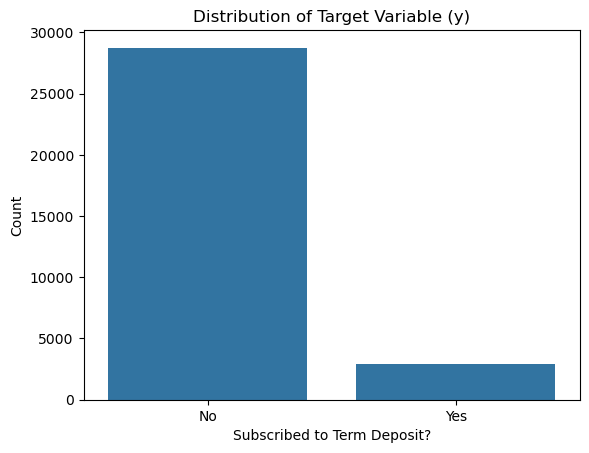

In [18]:
# Plot the distribution of the target variable
sns.countplot(x=y_train)
plt.title('Distribution of Target Variable (y)')
plt.xlabel('Subscribed to Term Deposit?')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

Based on the Target Variable Distribution , we can see that the dataset is **highly imbalanced**.

This imbalance means that the majority class (no) dominates the dataset, which could lead to biased models that perform poorly on the minority class (yes). Let’s address this step by step.

### Implications of Class Imbalance

**Model Bias**: A model trained on imbalanced data might predict the majority class most of the time, achieving high accuracy but failing to identify the minority class.

**Evaluation Metrics**: Accuracy is not a reliable metric for imbalanced datasets. Instead, we should focus on metrics like:

- Precision: How many predicted "yes" are actually "yes."
- Recall (Sensitivity): How many actual "yes" are correctly predicted.
- F1-Score: Harmonic mean of precision and recall.
- ROC-AUC: Measures the ability of the model to distinguish between classes.


## Numerical Features Analysis

Analyze the relationship between numerical features and the target variable.

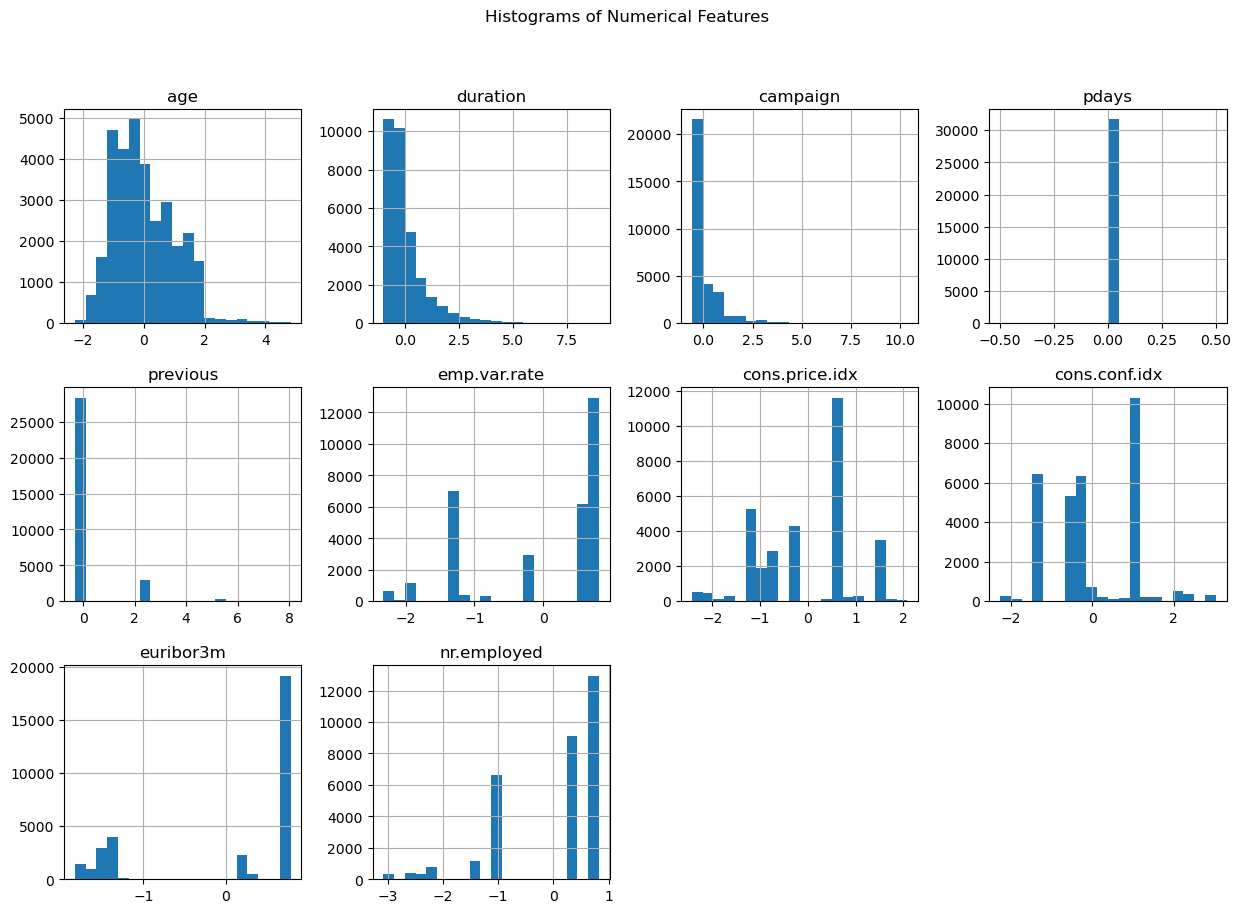

In [19]:
# Select numerical columns
numerical_columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 
                     'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Plot histograms for numerical features
X_train[numerical_columns].hist(bins=20, figsize=(15, 10), layout=(3, 4))
plt.suptitle('Histograms of Numerical Features')
plt.show()

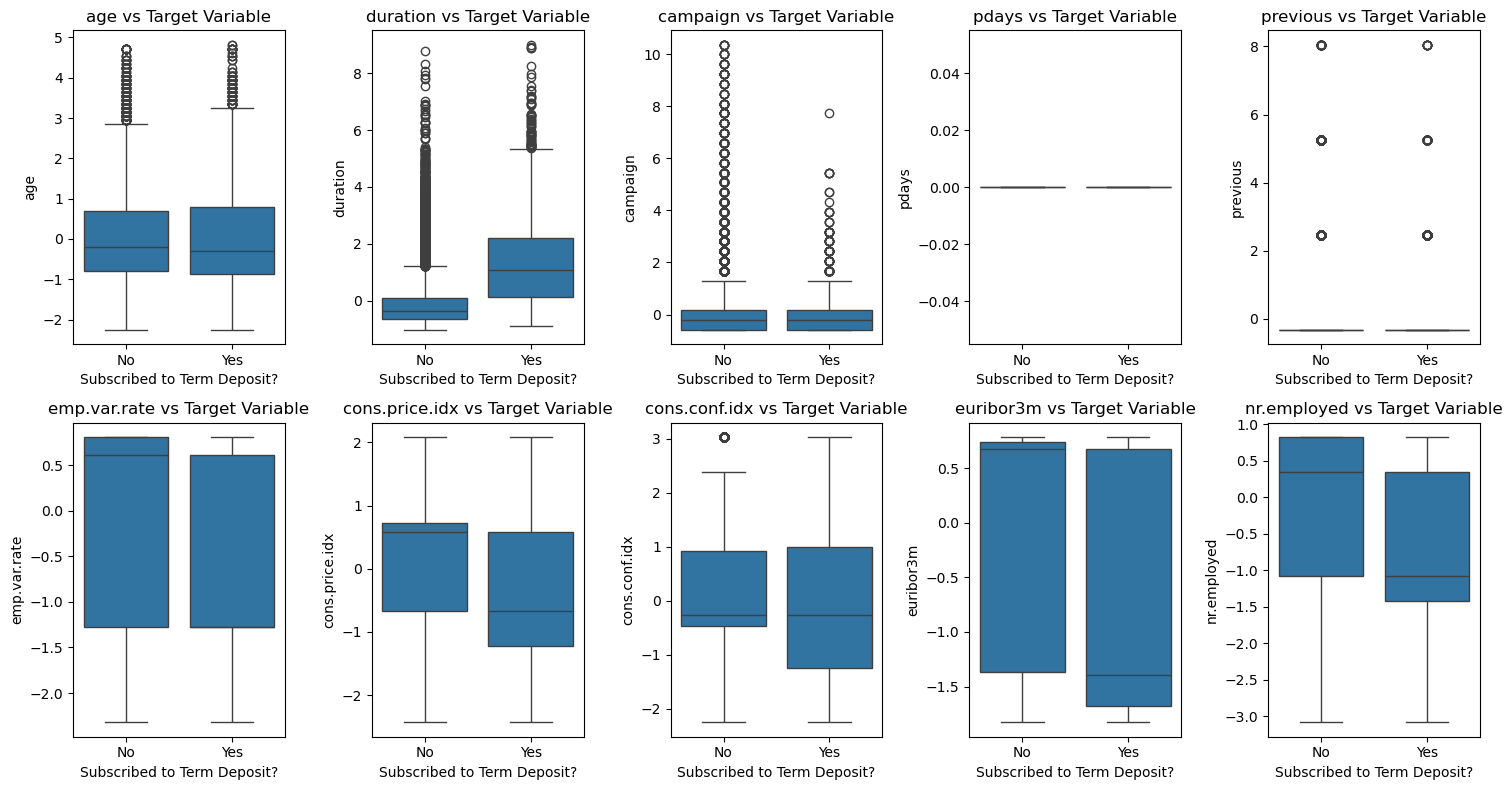

In [20]:
# Define subplot layout 
num_features = len(numerical_columns)
rows, cols = 2, 5  
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 8))

# Flatten axes array for easy indexing
axes = axes.flatten()

# Plot each numerical column
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=y_train, y=X_train[col], ax=axes[i])
    axes[i].set_title(f'{col} vs Target Variable', fontsize=12)
    axes[i].set_xlabel('Subscribed to Term Deposit?', fontsize=10)
    axes[i].set_ylabel(col, fontsize=10)
    axes[i].set_xticklabels(['No', 'Yes'])

# Hide any unused subplots
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### Key Insights

1. Strong Separating Features

Duration:  Customers who subscribed tend to have longer call durations. This suggests that longer conversations are more effective in convincing customers.
Campaign:  Successful subscriptions are associated with fewer campaign contacts. This indicates that persistent calling might lead to diminishing returns.
Nr.employed: Subscribers tend to have lower values for this feature, which could reflect economic conditions (e.g., fewer employed individuals may be more open to term deposits).

2. Moderate/Weak Separation

Emp.var.rate, Cons.conf.idx, Cons.price.idx, Euribor3m: These features show subtle differences between classes but with significant overlap. They might still contribute to the model but are less impactful individually.

3. Limited/No Separation

Age, Previous, Pdays: These features show minimal separation between classes. They may not be strong predictors on their own but could still contribute when combined with other features.


## Categorical Features

We’ll consolidate count plots for categorical features into a single figure.

## Correlation Heatmap

We’ll visualize correlations between numerical features in a single heatmap.

In [21]:
# Map 'no' to 0 and 'yes' to 1
y_train = y_train.map({'no': 0, 'yes': 1})
y_test = y_test.map({'no': 0, 'yes': 1})

# Verify the encoding
print("Training set target distribution:")
print(y_train.value_counts())

print("\nTesting set target distribution:")
print(y_test.value_counts())

Training set target distribution:
y
0    28744
1     2923
Name: count, dtype: int64

Testing set target distribution:
y
0    7186
1     731
Name: count, dtype: int64


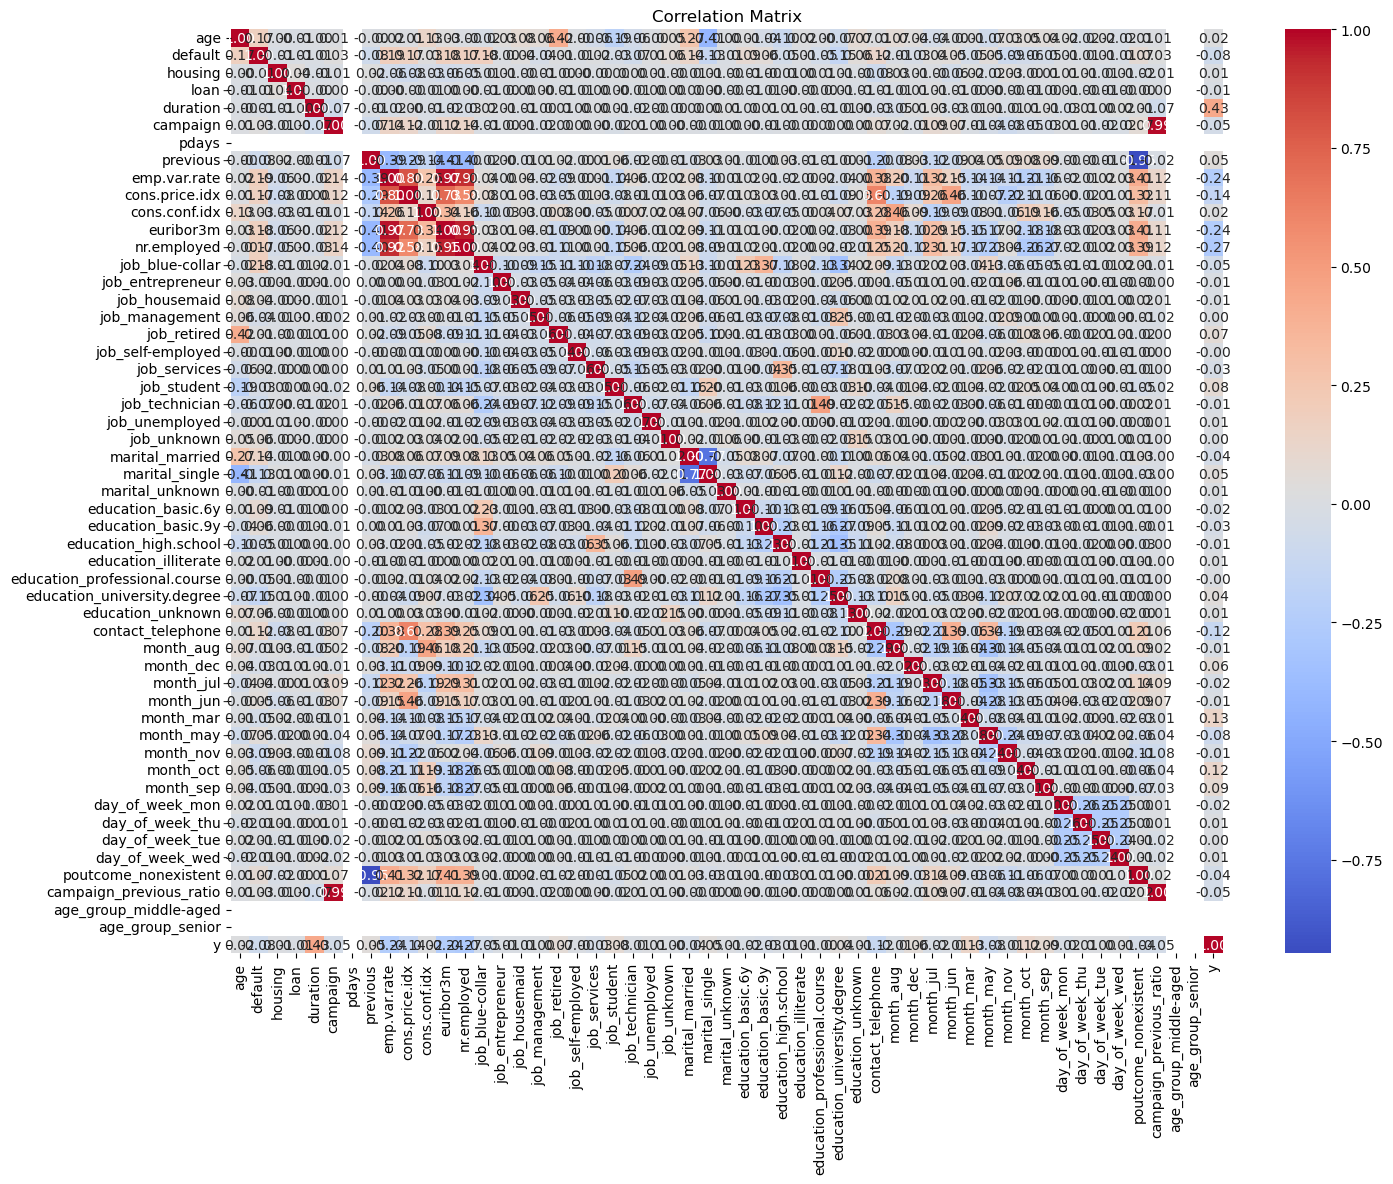

In [22]:
# Ensure the target variable is numeric (already encoded as 1/0)
train_with_target = X_train.copy()
train_with_target['y'] = y_train  # y_train should already be encoded as 1/0

# Compute correlation matrix
correlation_matrix = train_with_target.corr()

# Plot heatmap of correlations
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

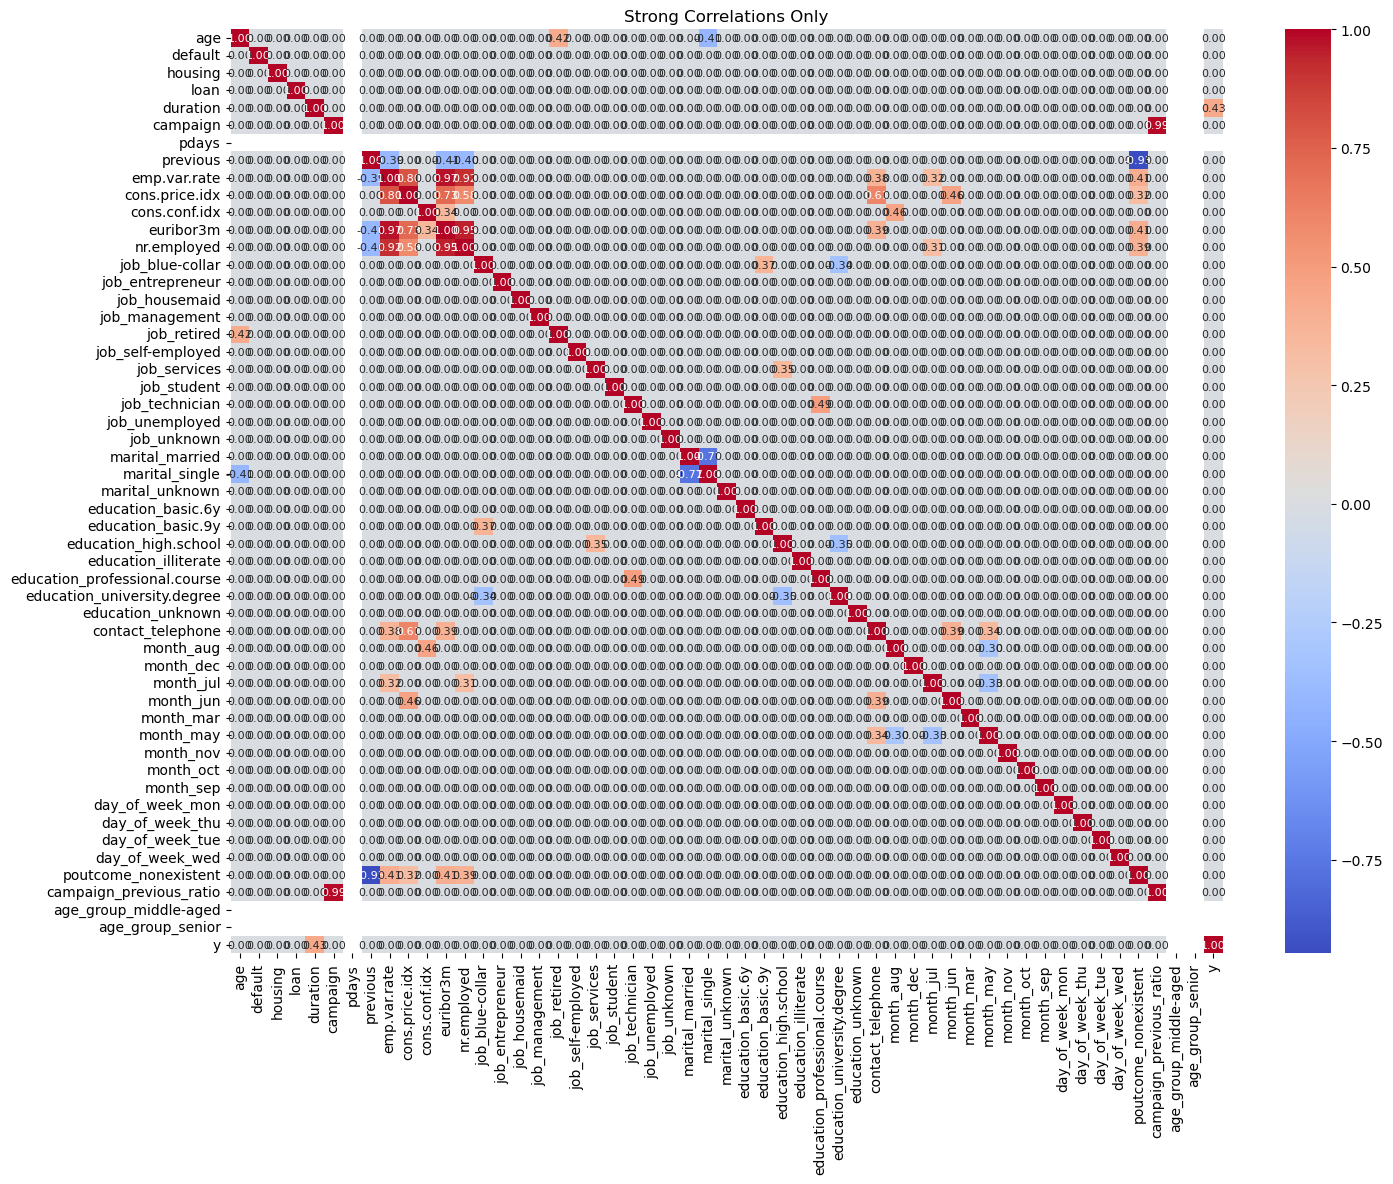

In [23]:
# Create a copy of the correlation matrix
strong_correlations = correlation_matrix.copy()

# Set weak correlations to zero
strong_correlations[abs(strong_correlations) < 0.3] = 0

# Plot the heatmap with strong correlations only
plt.figure(figsize=(16, 12))
sns.heatmap(strong_correlations, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 8})
plt.title('Strong Correlations Only')
plt.show()

### Key Insights

1. Duration: Shows the strongest positive correlation (0.43) with the target variable

This indicates that longer call durations are significantly associated with successful term deposit subscriptions

This makes intuitive sense as longer conversations might indicate more engaged customers or more thorough explanations of the product

2. Month_mar: Shows a weak to moderate positive correlation (around 0.13) with the target variable

Suggests that March might be a somewhat more favorable time for successful subscriptions

3. Month_sep and Month_oct: Show slight positive correlations (around 0.09-0.12) with the target variable

Indicates these months might be marginally better for subscription success

4. Campaign: Shows a negative correlation (-0.13) with the target variable

This is interesting as it suggests that requiring more contact attempts (campaigns) is associated with lower subscription success
Could indicate that customers who are more likely to subscribe often do so in fewer attempts

## Analyze Feature Importance

We’ll use a Random Forest Classifier to calculate feature importance. Random Forest is a robust algorithm that provides an estimate of feature importance based on how much each feature contributes to reducing impurity (Gini importance).

Top 10 Features by Importance:
                    Feature  Importance
4                  duration    0.426678
11                euribor3m    0.095857
0                       age    0.060350
12              nr.employed    0.045950
8              emp.var.rate    0.044550
9            cons.price.idx    0.026264
49  campaign_previous_ratio    0.025748
10            cons.conf.idx    0.024346
5                  campaign    0.023272
34        contact_telephone    0.013744
2                   housing    0.013274
40                month_may    0.010903
3                      loan    0.010103
1                   default    0.010103
24          marital_married    0.009369


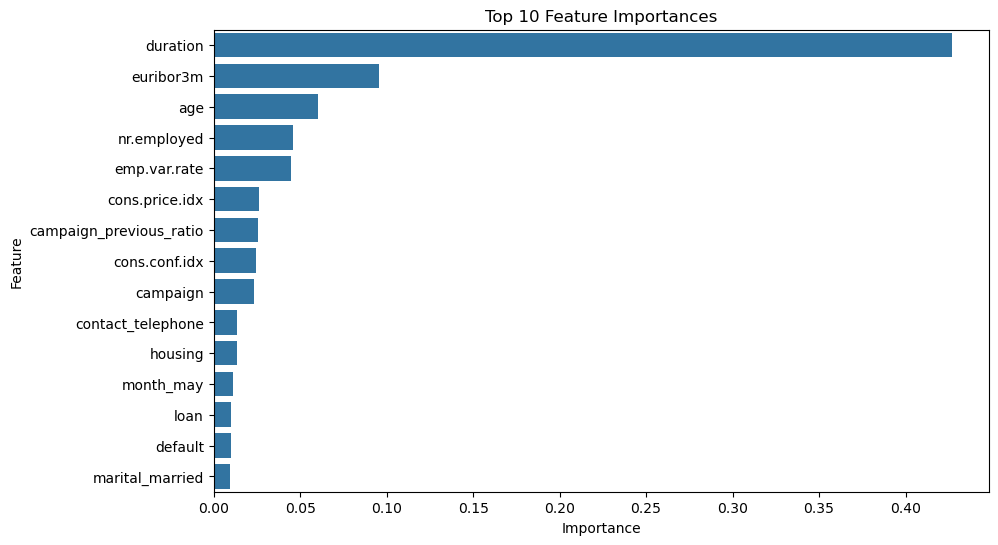

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# Extract feature importances
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display top 10 features
print("Top 10 Features by Importance:")
print(feature_importances.head(15))

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(15))
plt.title('Top 10 Feature Importances')
plt.show()

### Feature Importance Analysis: Key Insights

1. Top Predictor: Call Duration (0.415)

Most influential feature in determining subscription success.

Longer calls strongly correlate with positive outcomes, reinforcing earlier findings.

2. Economic Indicators Matter

Euribor3m (0.092): Reflects broader financial conditions influencing customer decisions.

Employment Metrics (emp.var.rate & nr.employed - both 0.046): Capture macroeconomic trends affecting consumer behavior.

emp.var.rate, euribor3m, and nr.employed are highly correlated (>0.9).

These features likely represent similar underlying economic conditions, so keeping all three might introduce redundancy.

3. Demographics Play a Role

Age (0.062): Moderately important, suggesting specific age groups are more likely to subscribe.

4. Campaign Effectiveness Insights

Campaign Previous Ratio (0.028): Indicates a meaningful relationship between past and current campaign contacts.

Campaign Contacts (0.024): Higher campaign contacts correlate negatively with success, aligning with earlier EDA findings.

5. Consumer Confidence and Price Index

cons.price.idx and cons.conf.idx show moderate correlations with the economic indicators cluster.

This suggests that these features might also overlap with the economic indicators.

6. Lesser but Notable Contributions

Features like cons.price.idx, cons.conf.idx, and contact_telephone have lower importance but still provide value in the model.

##  Feature Selection

### Addressing Multicollinearity

From the economic indicators cluster, we’ll keep only one representative feature and drop the others. Here’s how we decide which one to keep:

Retain the feature that has the highest importance (based on Random Forest feature importance) or the strongest correlation with the target variable.

From our earlier feature importance results:

- euribor3m had the second-highest importance (0.092).
- emp.var.rate and nr.employed were less important (0.046 each).

Thus, we’ll keep euribor3m and drop emp.var.rate and nr.employed.

In [25]:
# List of features
important_features = ['euribor3m', 'age', 'campaign_previous_ratio', 
 'cons.price.idx', 'cons.conf.idx', 'campaign', 'contact_telephone']

# Select only the important features
X_train_selected = X_train[important_features]
X_test_selected = X_test[important_features]

print(f"Selected {len(important_features)} features: {important_features}")

Selected 7 features: ['euribor3m', 'age', 'campaign_previous_ratio', 'cons.price.idx', 'cons.conf.idx', 'campaign', 'contact_telephone']


## Class Imbalances

Apply SMOTE to Balance the Training Data

We’ll use SMOTE to oversample the minority class (y_train) in the training set (X_train_selected).

In [26]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_selected, y_train)

# Check the new distribution of the target variable
print("Resampled training set target distribution:")
print(y_train_resampled.value_counts())

Resampled training set target distribution:
y
0    28744
1    28744
Name: count, dtype: int64


# Modeling

Now that we’ve selected the most important features and apply SMOTE, let’s build and evaluate machine learning models. We’ll start with **Logistic Regression as a baseline model.**

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Train a Logistic Regression model
model = LogisticRegression(random_state=42)  # No need for class_weight since data is balanced
model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = model.predict(X_test_selected)
y_pred_proba = model.predict_proba(X_test_selected)[:, 1]

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.2f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.75      0.84      7186
           1       0.20      0.62      0.30       731

    accuracy                           0.74      7917
   macro avg       0.58      0.68      0.57      7917
weighted avg       0.88      0.74      0.79      7917

ROC-AUC Score: 0.73


### Experiment with Advanced Models

Once the baseline model is evaluated, we can experiment with more advanced models like Random Forest or Gradient Boosting .

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_rf = rf.predict(X_test_selected)
y_pred_proba_rf = rf.predict_proba(X_test_selected)[:, 1]

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# ROC-AUC Score
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"Random Forest ROC-AUC Score: {roc_auc_rf:.2f}")

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7186
           1       0.31      0.29      0.30       731

    accuracy                           0.87      7917
   macro avg       0.62      0.61      0.62      7917
weighted avg       0.87      0.87      0.87      7917

Random Forest ROC-AUC Score: 0.72
